In [1]:
import pandas as pd # Librería para análisis de datos
import numpy as np # Librería para análisis numérico
import matplotlib.pyplot as plt # Librería para visualización


plt.style.use('seaborn-white') # Para configurar un estilo de gráfico

%matplotlib inline 


## Generar y visualizar datos

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

#X, y = datasets.make_moons(n_samples=300, noise=0.3, random_state=10)
X, y = datasets.make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=1)

X_df = pd.DataFrame(X, columns = ['x1', 'x2'])
y_df = pd.DataFrame(y, columns = ['y'])

df = pd.concat([X_df, y_df], axis=1)

df.head(10)

,x1,x2,y
0,-0.140120,0.715737,1
1,0.450141,-0.774099,0
2,0.034433,0.677435,1
3,-0.157656,0.284413,1
4,-0.285640,-1.330758,0
5,0.529501,-0.812718,0
6,-0.049264,0.839040,1
7,-1.115297,0.281321,0
8,0.286621,-0.248214,1
9,-0.271863,-0.443737,1


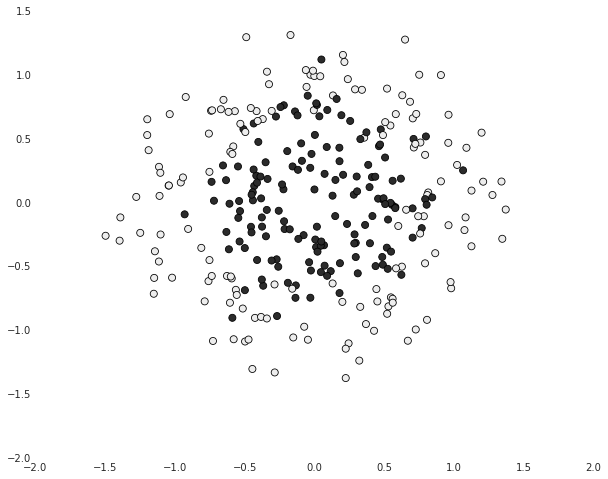

In [3]:
plt.figure(figsize=(10,8))
plt.rc('axes',edgecolor='w')
plt.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="Greys", vmin=-.2, vmax=1.2,
           edgecolor="k", linewidth=.8)
plt.show()

## Machine learning

In [4]:
# FUNCIONES

def ajuste_pred(algoritmo, x, y):
    
    """
    + input:
        - algoritmo
        - x: matriz de atributos
        - y: vector de clases
        
    + output:
        - clasificador ajustado
        - df_tr: pandas DataFrame (objeto) con datos del conjunto de entrenamiento
        - df_test: pandas DataFrame (objeto) con datos del conjunto de test
    
    """
    
    x_tr, x_test, y_tr, y_test = train_test_split(X, y,
                                                  test_size=.30,
                                                  random_state=2)
    clf = algoritmo.fit(x_tr, y_tr)
    yPred = clf.predict(x_test)
    yProbs = clf.predict_proba(x_test)[:, 1]
    
    df_tr = pd.DataFrame({
            'x1':x_tr[:,0],
            'x2':x_tr[:,1],
            'y_real': y_tr,
        })
    
    df_test = pd.DataFrame({ 
            'x1':x_test[:,0],
            'x2':x_test[:,1],
            'y_real': y_test,
            'yPred': yPred,
            'yProb': yProbs
        })
    
    return clf, df_tr, df_test


def plot_boundaries(clasificador, df_tr, df_test, color='Reds'):
    
    """
    + input:
        - clasificador
        - df_tr: pandas DataFrame (objeto) con datos del conjunto de entrenamiento
        - df_test: pandas DataFrame (objeto) con datos del conjunto de test
        - color: mapa de colores (default: Reds)
     
    """
    
    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    probs = clasificador.predict_proba(grid)[:, 1].reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, probs, 50, cmap=color,
                      vmin=0, vmax=1)
    
    plot_train = plt.scatter(df_tr['x1'], df_tr['x2'], c=df_tr['y_real'], s=40,
               cmap=color, vmin=-.2, vmax=1.2,
               edgecolor="k", linewidth=.8, alpha=.3)

    plot_test = plt.scatter(df_test['x1'], df_test['x2'], c=df_test['y_real'], s=60,
           cmap=color, vmin=-.2, vmax=1.2,
           edgecolor="k", linewidth=.8)
    
    plt.title('Frontera de decisión')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.show()

    
def metricas(df_test):
    
    """
    + input:
        - df_test: pandas DataFrame (objeto) con datos del conjunto de test
        
    + output:
        - conf_matrix: pandas DataFrame (objeto)
        - report
    
    """
    
    conf_matrix = pd.DataFrame(metrics.confusion_matrix(df_test['y_real'], df_test['yPred']),
                               columns = ['Predice 0', 'Predice 1'],
                               index = ['Real 0', 'Real 1'])

    report = metrics.classification_report(df_test['y_real'], df_test['yPred'])
    
    print("Matriz de confusión:\n{0}\n\nMétricas:\n{1}".format(conf_matrix,report))
    
    return conf_matrix, report

In [5]:
# ALGORITMOS

from sklearn import linear_model, tree, ensemble, svm

log_reg = linear_model.LogisticRegression(C=1e5)
svc = svm.SVC(C=1.0, kernel='rbf', degree=3, probability=True)
dec_tree = tree.DecisionTreeClassifier(max_depth=5)
rand_forest = ensemble.RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
boost = ensemble.GradientBoostingClassifier(max_depth=5, n_estimators=10, max_features=1)

### Logistic Regression

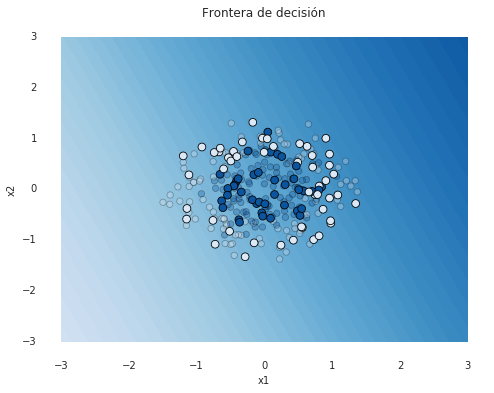

Matriz de confusión:
        Predice 0  Predice 1
Real 0         13         37
Real 1         11         29

Métricas:
             precision    recall  f1-score   support

          0       0.54      0.26      0.35        50
          1       0.44      0.72      0.55        40

avg / total       0.50      0.47      0.44        90



,x1,x2,yPred,yProb,y_real
0,-0.378180,-0.602272,0,0.472712,1
1,-0.671584,0.732781,0,0.498478,0
2,-0.412572,0.156980,0,0.498739,1
3,-0.116365,-0.283625,1,0.507361,1
4,0.091193,0.727077,1,0.563473,1


In [6]:
clf_lr, df_lr_tr, df_lr_test = ajuste_pred(log_reg, X, y)
plot_boundaries(clf_lr, df_lr_tr, df_lr_test, "Blues")
metricas(df_lr_test)
df_lr_test.head(5)

### SVC

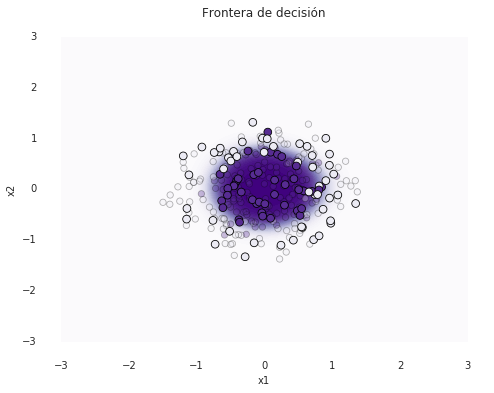

Matriz de confusión:
        Predice 0  Predice 1
Real 0         40         10
Real 1          1         39

Métricas:
             precision    recall  f1-score   support

          0       0.98      0.80      0.88        50
          1       0.80      0.97      0.88        40

avg / total       0.90      0.88      0.88        90



,x1,x2,yPred,yProb,y_real
0,-0.378180,-0.602272,1,0.598095,1
1,-0.671584,0.732781,0,0.102641,0
2,-0.412572,0.156980,1,0.963320,1
3,-0.116365,-0.283625,1,0.983114,1
4,0.091193,0.727077,1,0.676108,1


In [7]:
clf_svc, df_svc_tr, df_svc_test = ajuste_pred(svc, X, y)
plot_boundaries(clf_svc, df_svc_tr, df_svc_test, "Purples")
metricas(df_svc_test)
df_svc_test.head(5)

### Decision Tree

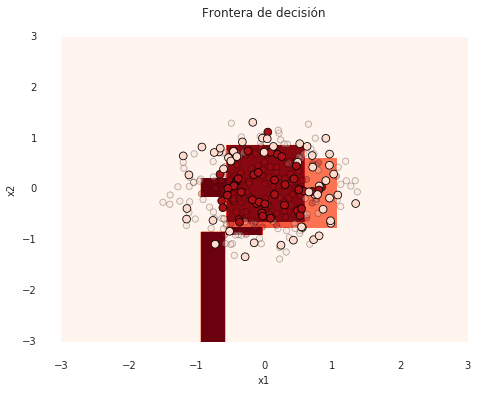

Matriz de confusión:
        Predice 0  Predice 1
Real 0         39         11
Real 1          7         33

Métricas:
             precision    recall  f1-score   support

          0       0.85      0.78      0.81        50
          1       0.75      0.82      0.79        40

avg / total       0.80      0.80      0.80        90



,x1,x2,yPred,yProb,y_real
0,-0.378180,-0.602272,1,0.9375,1
1,-0.671584,0.732781,0,0.0000,0
2,-0.412572,0.156980,1,0.9375,1
3,-0.116365,-0.283625,1,0.9375,1
4,0.091193,0.727077,1,0.9375,1


In [8]:
clf_dt, df_dt_tr, df_dt_test = ajuste_pred(dec_tree, X, y)
plot_boundaries(clf_dt, df_dt_tr, df_dt_test, "Reds")
metricas(df_dt_test)
df_dt_test.head(5)

### Random Forest

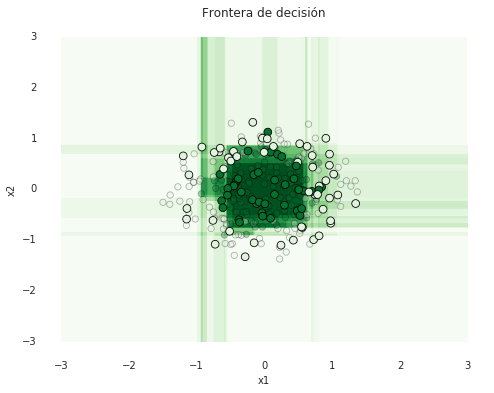

Matriz de confusión:
        Predice 0  Predice 1
Real 0         42          8
Real 1          6         34

Métricas:
             precision    recall  f1-score   support

          0       0.88      0.84      0.86        50
          1       0.81      0.85      0.83        40

avg / total       0.85      0.84      0.84        90



,x1,x2,yPred,yProb,y_real
0,-0.378180,-0.602272,1,0.781059,1
1,-0.671584,0.732781,0,0.222906,0
2,-0.412572,0.156980,1,0.969387,1
3,-0.116365,-0.283625,1,0.948792,1
4,0.091193,0.727077,1,0.637730,1


In [9]:
clf_rf, df_rf_tr, df_rf_test = ajuste_pred(rand_forest, X, y)
plot_boundaries(clf_rf, df_rf_tr, df_rf_test, "Greens")
metricas(df_rf_test)
df_rf_test.head(5)

### Gradient Boosting

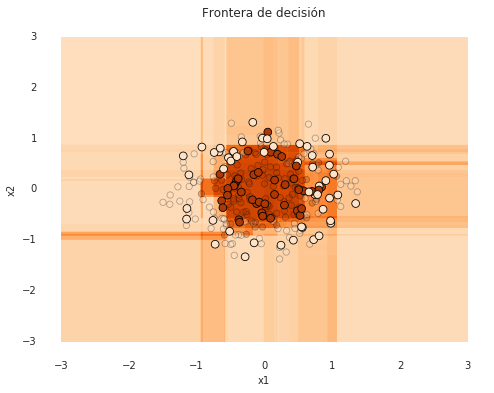

Matriz de confusión:
        Predice 0  Predice 1
Real 0         36         14
Real 1          5         35

Métricas:
             precision    recall  f1-score   support

          0       0.88      0.72      0.79        50
          1       0.71      0.88      0.79        40

avg / total       0.81      0.79      0.79        90



,x1,x2,yPred,yProb,y_real
0,-0.378180,-0.602272,1,0.666478,1
1,-0.671584,0.732781,0,0.245626,0
2,-0.412572,0.156980,1,0.775748,1
3,-0.116365,-0.283625,1,0.775748,1
4,0.091193,0.727077,1,0.693662,1


In [10]:
clf_gb, df_gb_tr, df_gb_test = ajuste_pred(boost, X, y)
plot_boundaries(clf_gb, df_gb_tr, df_gb_test, "Oranges")
metricas(df_gb_test)
df_gb_test.head(5)